In [7]:
#if autoviz is not installed
pip install autoviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from autoviz import AutoViz_Class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import time
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import auc as skl_auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [32]:
#load the dataset
df = pd.read_csv('data/train.csv')

In [33]:
#sample the data
df.head()

id  Gender     Age      Height     Weight   family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950               yes                
1   1  Female  18.000000  1.560000   57.000000               yes                
2   2  Female  18.000000  1.711460   50.165754               yes                
3   3  Female  20.952737  1.710730  131.274851               yes                
4   4    Male  31.641081  1.914186   93.798055               yes                

  FAVC    FCVC       NCP       CAEC    SMOKE    CH2O   SCC     FAF    \
0  yes  2.000000  2.983297   Sometimes   no   2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently   no   2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes   no   1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes   no   1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes   no   1.979848  no  1.967973   

      TUE      CALC            MTRANS              NObeyesdad       
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [34]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [35]:
# Display descriptive statistics (removed scientific notation)
df.describe()

id            Age         Height        Weight         FCVC      \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

            NCP          CH2O           FAF           TUE      
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [36]:
df.tail()

id   Gender     Age      Height     Weight    \
20753  20753  Male   25.137087  1.766626  114.187096   
20754  20754  Male   18.000000  1.710000   50.000000   
20755  20755  Male   20.101026  1.819557  105.580491   
20756  20756  Male   33.852953  1.700000   83.520113   
20757  20757  Male   26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC    FCVC       NCP       CAEC     \
20753               yes               yes  2.919584  3.000000   Sometimes   
20754                no               yes  3.000000  4.000000  Frequently   
20755               yes               yes  2.407817  3.000000   Sometimes   
20756               yes               yes  2.671238  1.971472   Sometimes   
20757               yes               yes  3.000000  3.000000   Sometimes   

      SMOKE    CH2O   SCC     FAF       TUE      CALC     \
20753   no   2.151809  no  1.330519  0.196680  Sometimes   
20754   no   1.000000  no  2.000000  1.000000  Sometimes   
20755   no   2.000000  no  1.158040  1.198439         no   
20756   no   2.144838  no  0.000000  0.973834         no   
20757   no   2.003563  no  0.684487  0.713823  Sometimes   

              MTRANS              NObeyesdad       
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II

In [37]:
df.duplicated().sum()

0

In [38]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Shape of your Data Set loaded: (20758, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id']
To fix these data quality issues in the dataset, import FixD

Number of All Scatter Plots = 36


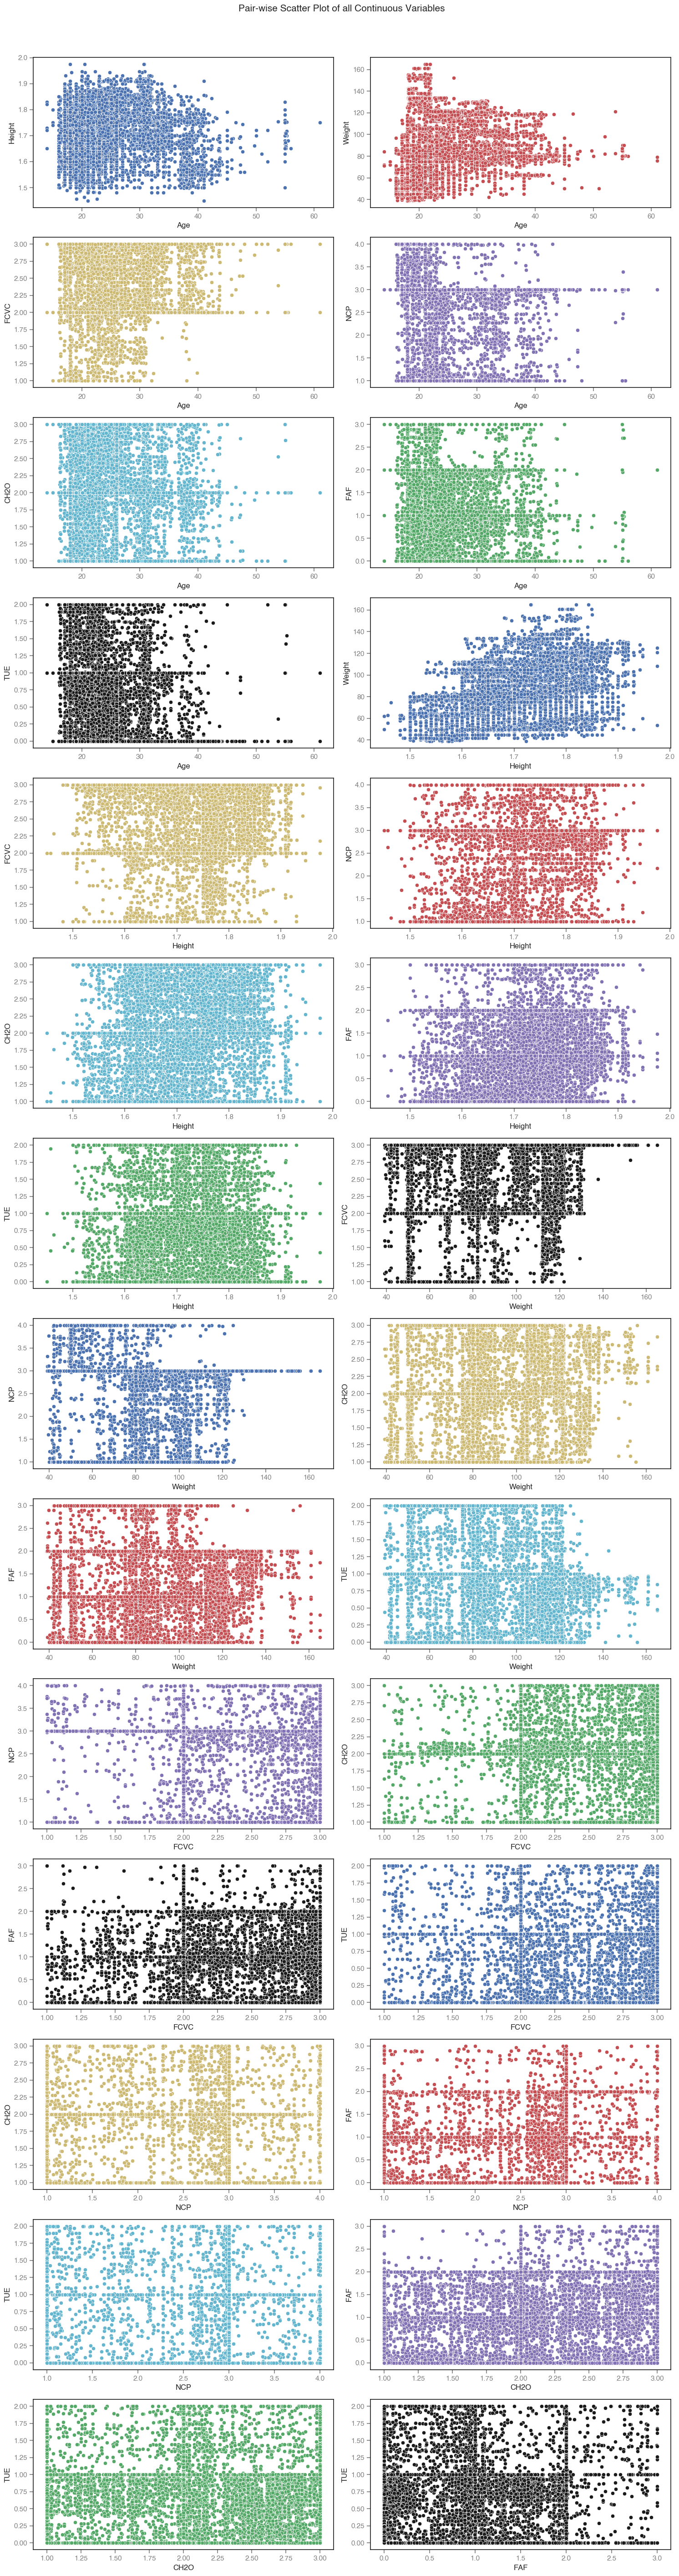

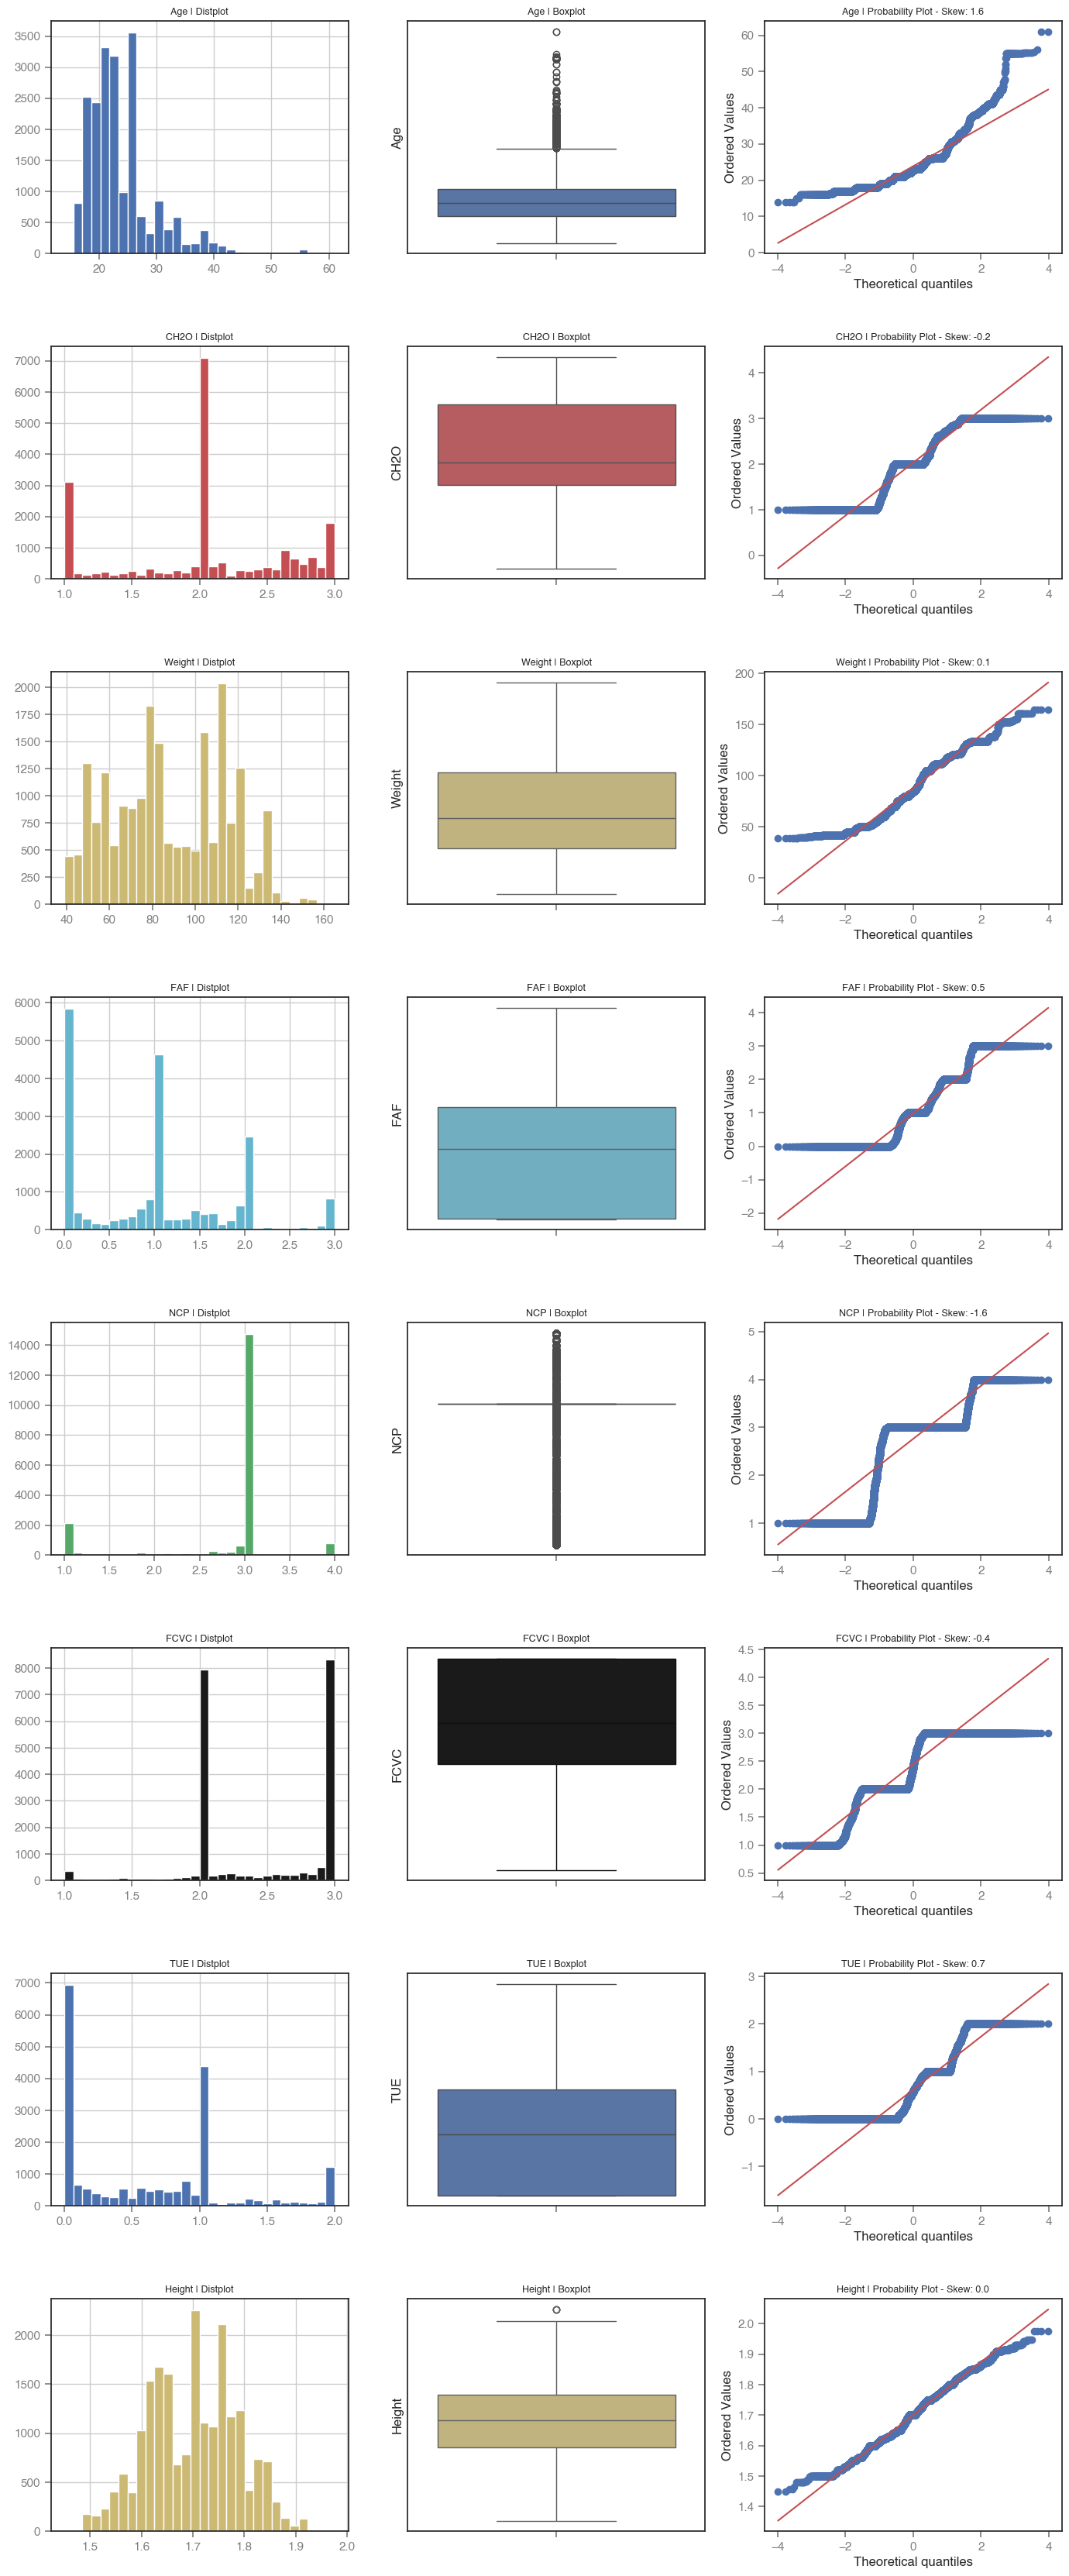

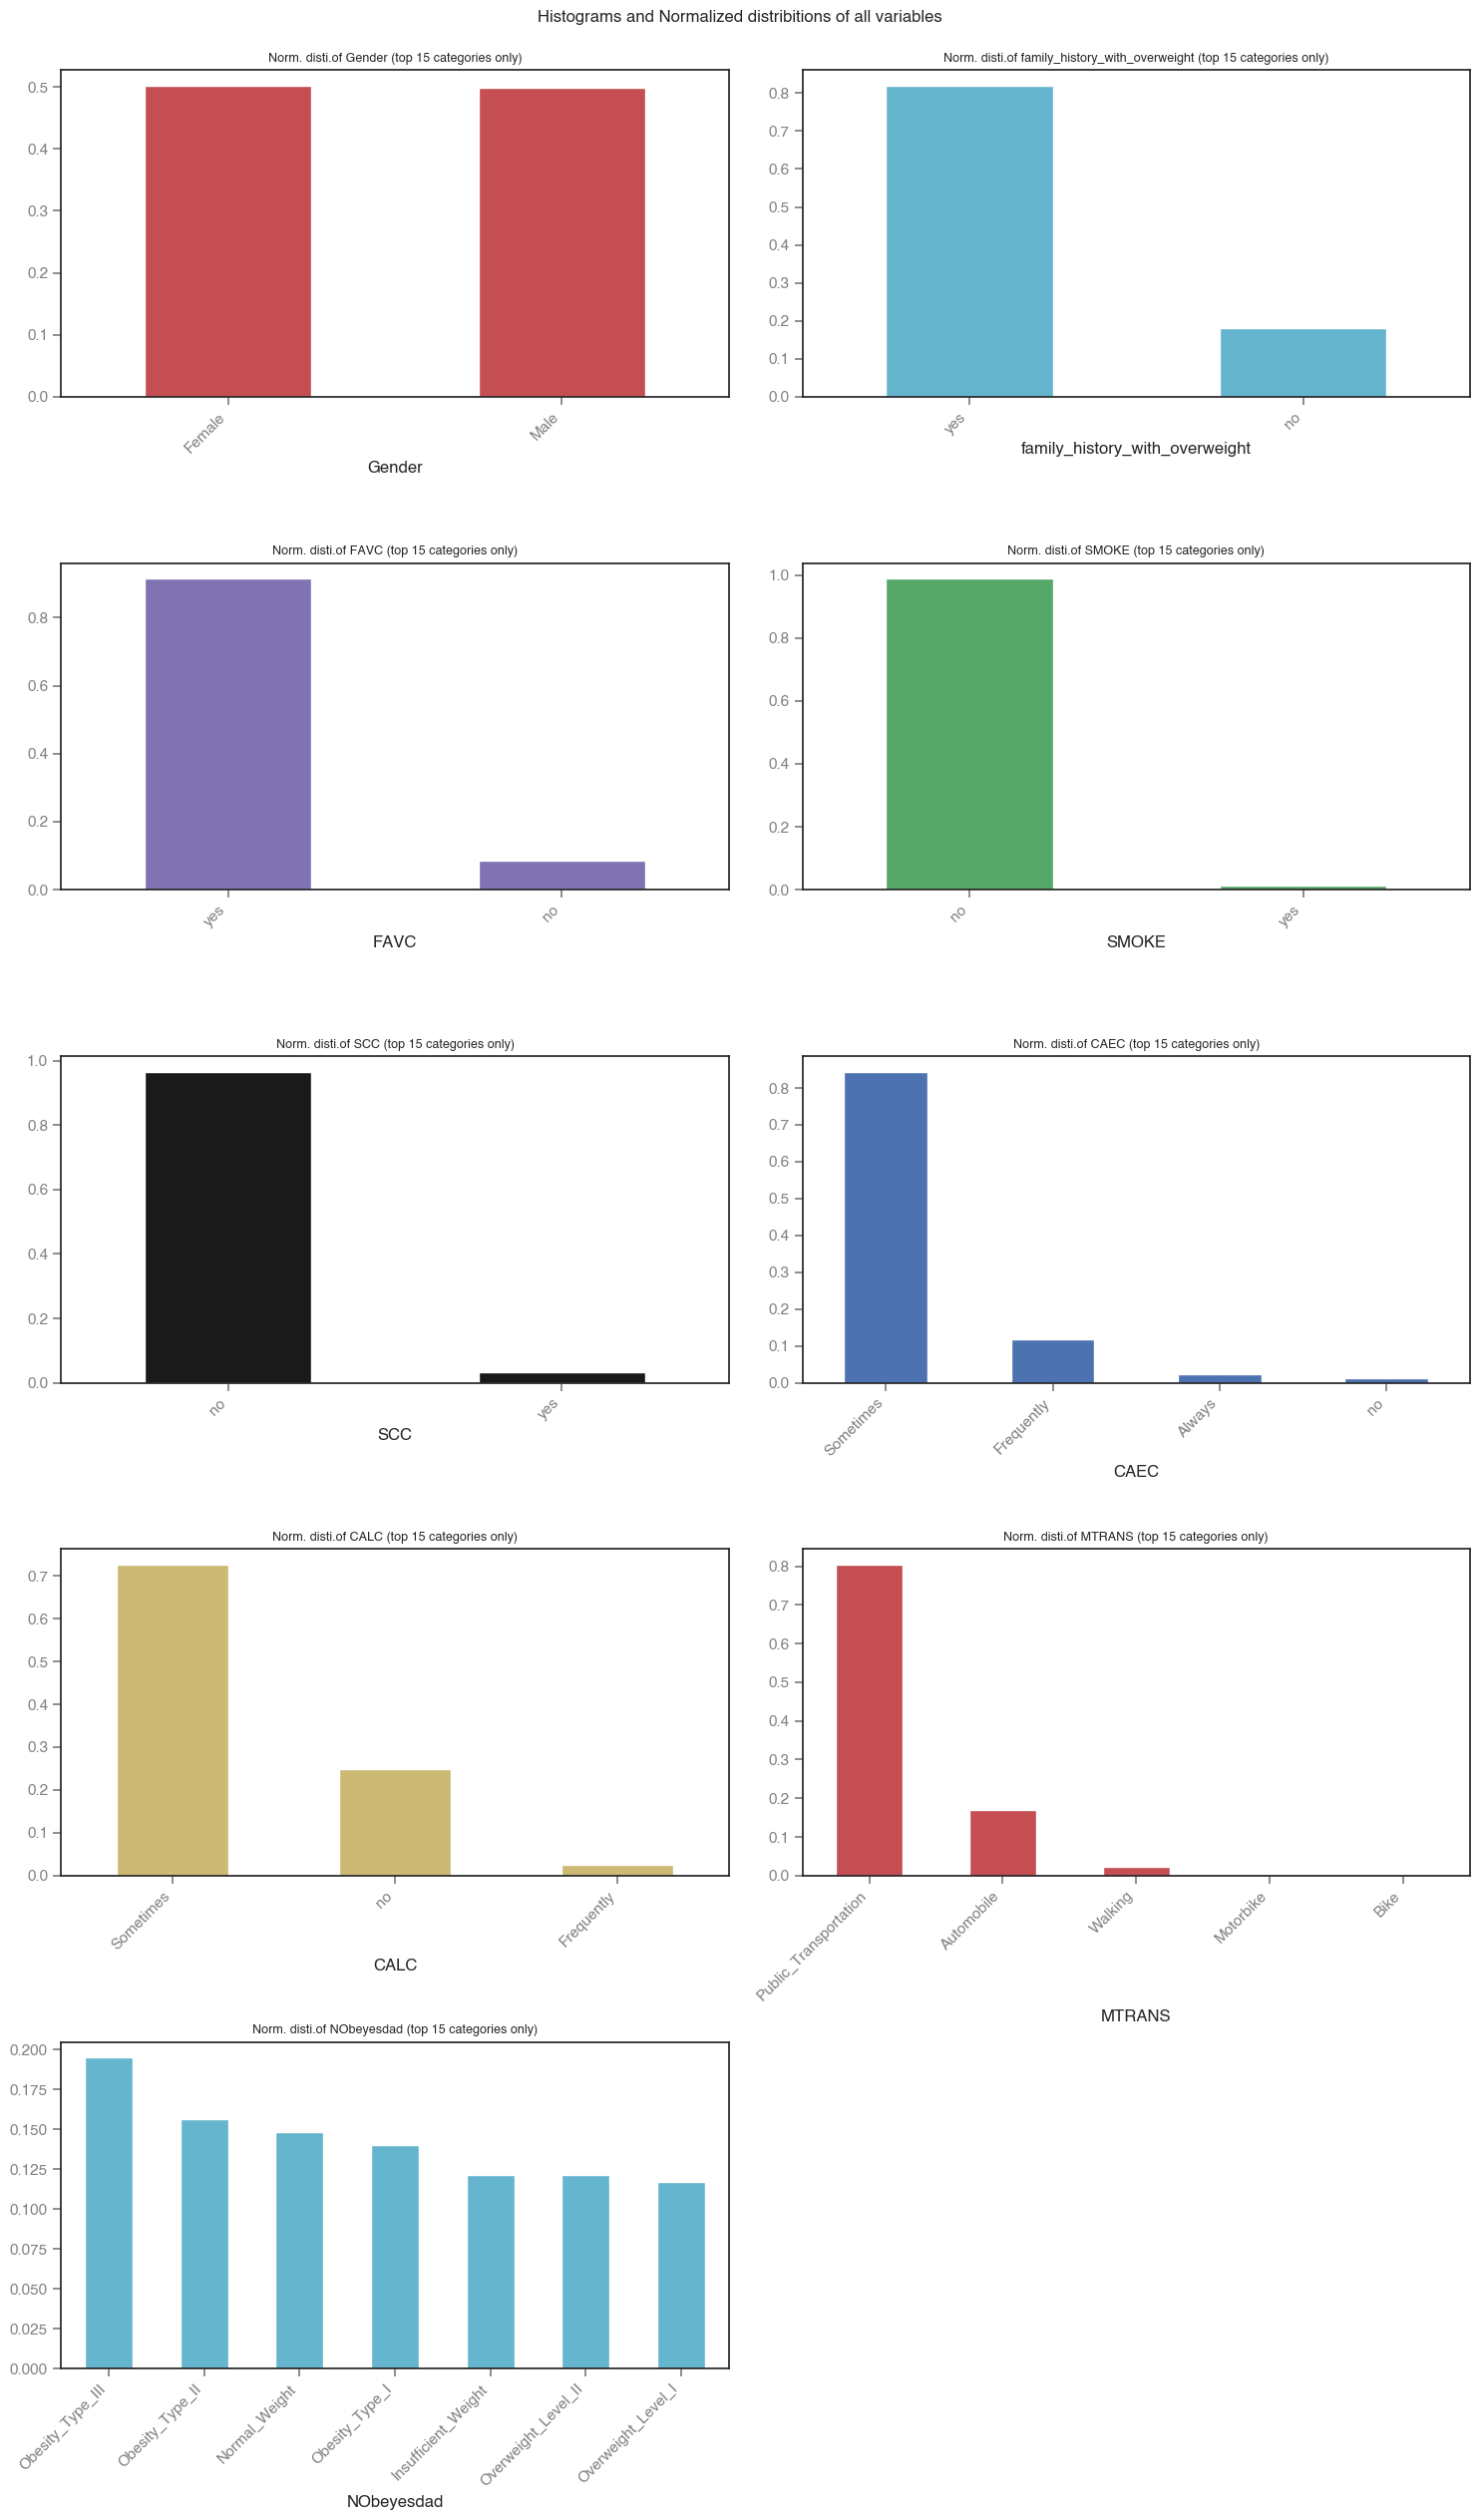

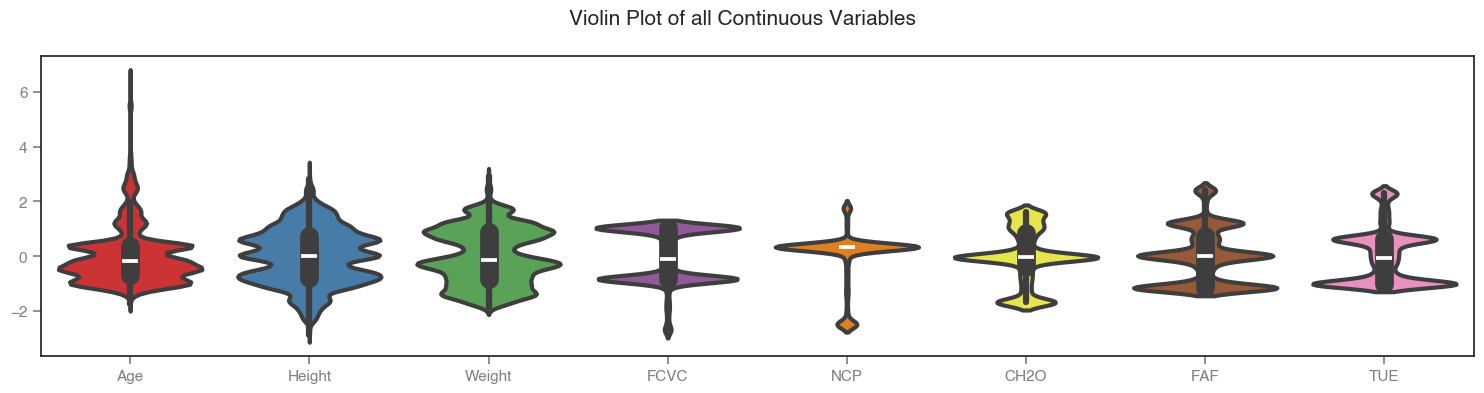

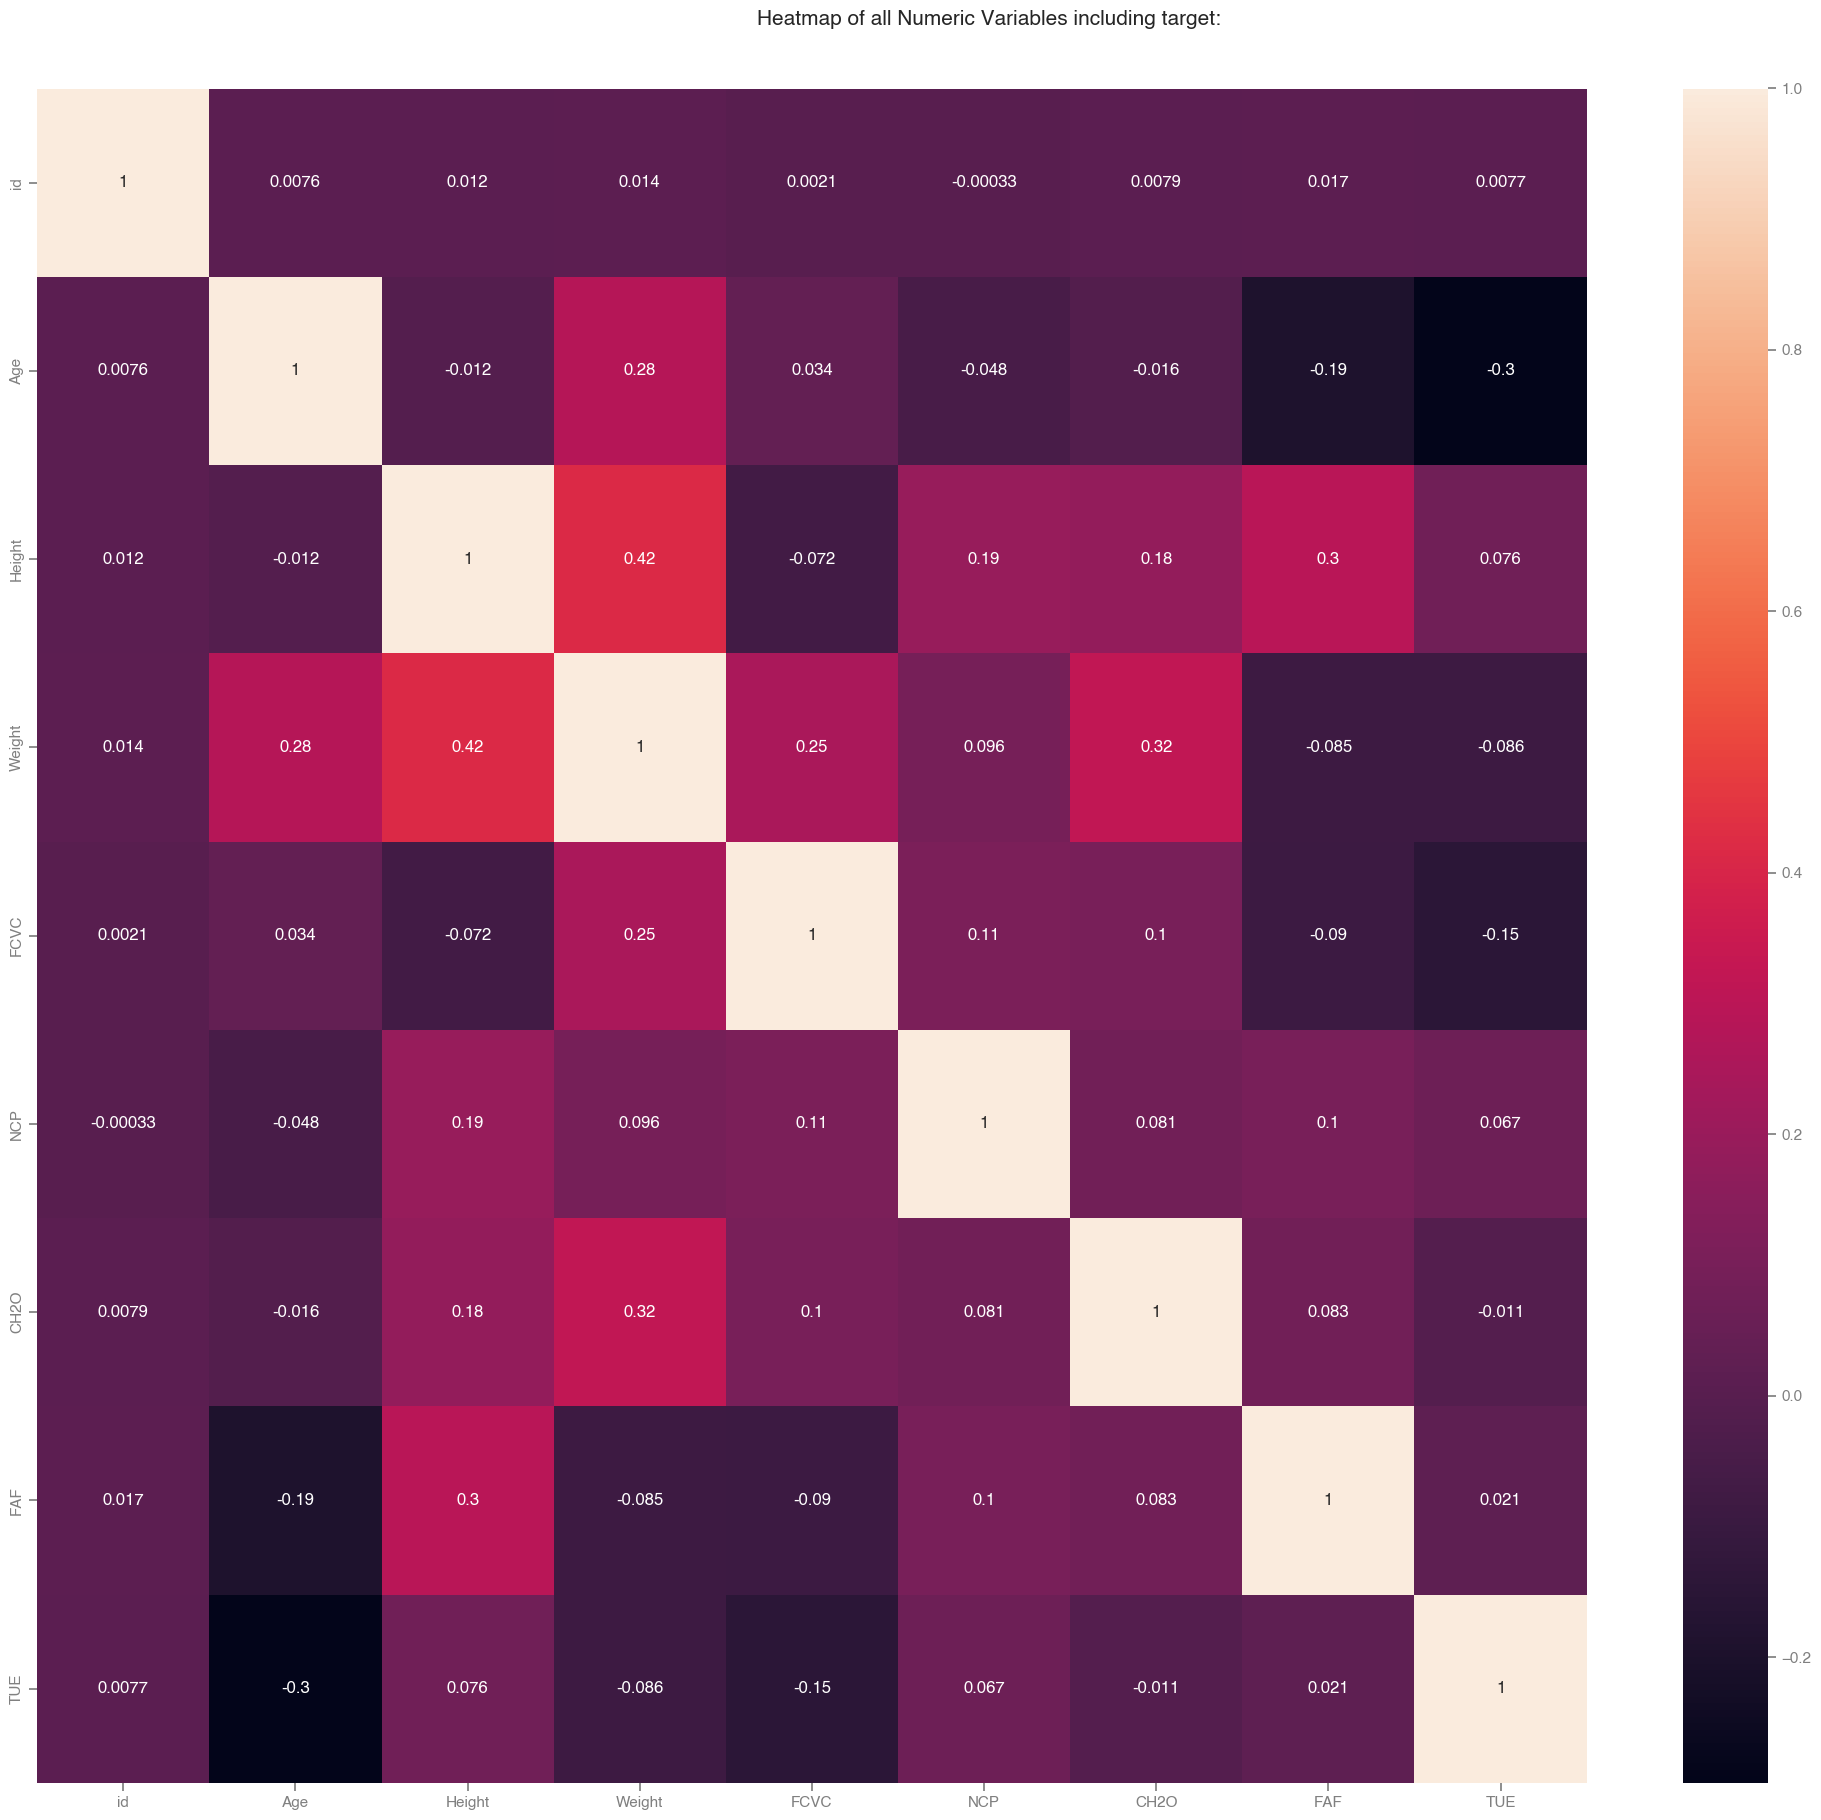

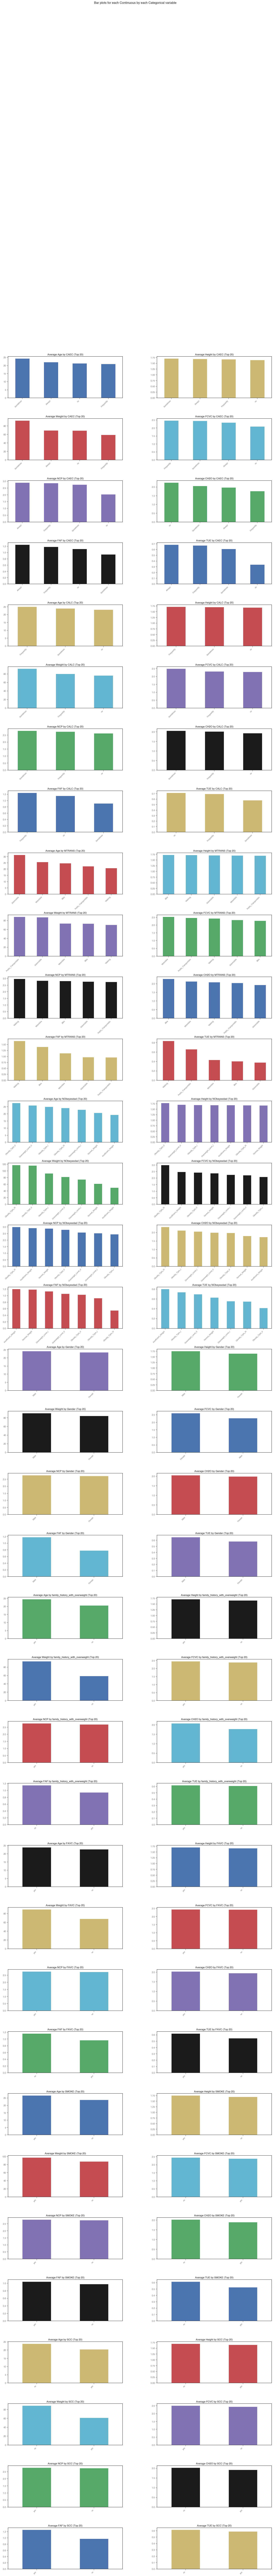

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [40]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()
%matplotlib inline

# Run AutoViz to generate plots
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
)

# Save all plots to a single PDF file
with PdfPages('autoviz_plots.pdf') as pdf:
    for i in plt.get_fignums():
        plt.figure(i)
        pdf.savefig()  # Save the current figure
        plt.close()  # Close the figure after saving


In [10]:
# Check for missing values
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

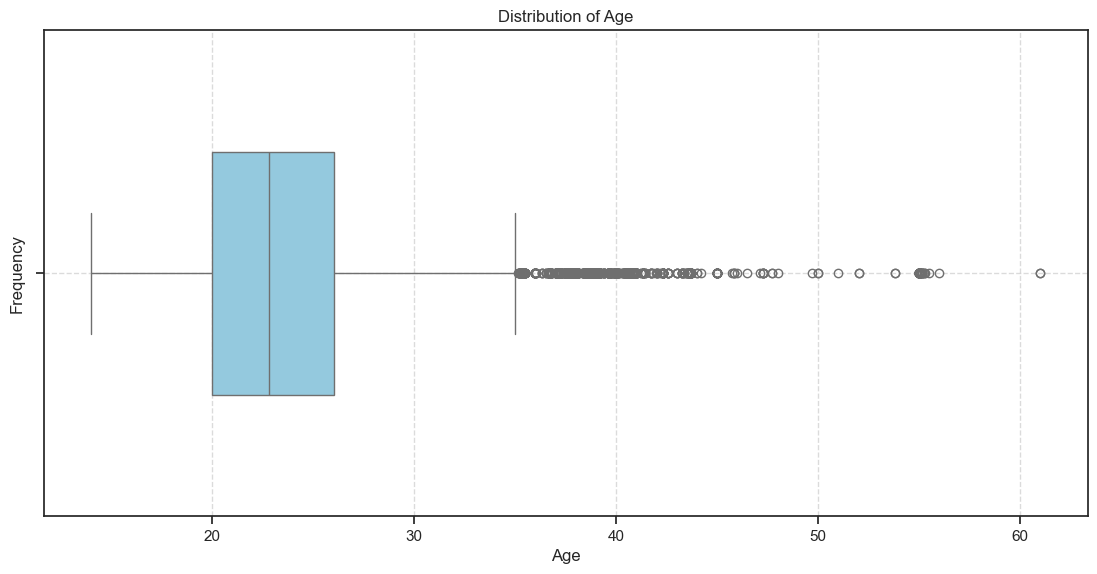

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Age'], color='skyblue', width=0.5)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Engineering Features

In [12]:
# remove data with age > 35 (above upper fence 1.5 * Q3) - 1074 rows dropped
df = df[df['Age'] < 35]

In [13]:
#one encoding categorical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['MTRANS']
ord_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC' ]

# CAEC Values - No, Sometimes, Frequently, Always
# CALC values - No, Sometimes, Frquently

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        (OrdinalEncoder(), ord_cols),
        remainder='passthrough', verbose_feature_names_out=False)

df = pd.DataFrame(col_transformer.fit_transform(df), columns = col_transformer.get_feature_names_out())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MTRANS_Automobile               19651 non-null  object
 1   MTRANS_Bike                     19651 non-null  object
 2   MTRANS_Motorbike                19651 non-null  object
 3   MTRANS_Public_Transportation    19651 non-null  object
 4   MTRANS_Walking                  19651 non-null  object
 5   Gender                          19651 non-null  object
 6   family_history_with_overweight  19651 non-null  object
 7   FAVC                            19651 non-null  object
 8   CAEC                            19651 non-null  object
 9   SMOKE                           19651 non-null  object
 10  SCC                             19651 non-null  object
 11  CALC                            19651 non-null  object
 12  id                              19651 non-null

In [15]:
df.head()

MTRANS_Automobile MTRANS_Bike MTRANS_Motorbike MTRANS_Public_Transportation  \
0         0.0            0.0           0.0                    1.0               
1         1.0            0.0           0.0                    0.0               
2         0.0            0.0           0.0                    1.0               
3         0.0            0.0           0.0                    1.0               
4         0.0            0.0           0.0                    1.0               

  MTRANS_Walking Gender family_history_with_overweight FAVC CAEC SMOKE SCC   \
0       0.0        1.0                1.0               1.0  2.0   0.0  0.0   
1       0.0        0.0                1.0               1.0  1.0   0.0  0.0   
2       0.0        0.0                1.0               1.0  2.0   0.0  0.0   
3       0.0        0.0                1.0               1.0  2.0   0.0  0.0   
4       0.0        1.0                1.0               1.0  2.0   0.0  0.0   

  CALC id    Age       Height     Weight      FCVC      NCP       CH2O    \
0  1.0  0  24.443011  1.699998    81.66995       2.0  2.983297  2.763573   
1  2.0  1       18.0      1.56        57.0       2.0       3.0       2.0   
2  2.0  2       18.0   1.71146   50.165754  1.880534  1.411685  1.910378   
3  1.0  3  20.952737   1.71073  131.274851       3.0       3.0  1.674061   
4  1.0  4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   

     FAF       TUE         NObeyesdad       
0       0.0  0.976473  Overweight_Level_II  
1       1.0       1.0        Normal_Weight  
2  0.866045  1.673584  Insufficient_Weight  
3  1.467863  0.780199     Obesity_Type_III  
4  1.967973  0.931721  Overweight_Level_II

### Train/Test Split

In [16]:
X = df.drop('NObeyesdad', axis = 1)
y= df['NObeyesdad']

In [17]:
#current distribution
y.value_counts(normalize = True)

NObeyesdad
Obesity_Type_III       0.205893
Obesity_Type_II        0.155819
Normal_Weight          0.155565
Insufficient_Weight    0.128034
Obesity_Type_I         0.122844
Overweight_Level_II    0.116432
Overweight_Level_I     0.115414
Name: proportion, dtype: float64

In [18]:
# Define a mapping from the original categories to binary categories
def map_to_binary(category):
    if category in ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I']:
        return 1
    else:
        return 0

# Apply the mapping function to the 'NObeyesdad' column
y = y.apply(map_to_binary)

# Verify the new distribution
print(y.value_counts(normalize=True))


NObeyesdad
0    0.515445
1    0.484555
Name: proportion, dtype: float64


In [19]:
#split into test and train datasets. Stratifying split given the dataset is highly imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42, test_size=0.7, stratify = y)

In [20]:
Model_LR=LogisticRegression()

In [21]:
Model_LR.fit(X_train,y_train)

LogisticRegression()

In [22]:
Model_LR.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [23]:
print(classification_report(Model_LR.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7118
           1       0.93      0.94      0.94      6638

    accuracy                           0.94     13756
   macro avg       0.94      0.94      0.94     13756
weighted avg       0.94      0.94      0.94     13756



In [24]:
#validaing assumuption for model performance using a baseline model. classifier model output needs to be better than 89%
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.5154114568188427


### A Baseline Model

In [25]:
from sklearn.dummy import DummyClassifier

#validaing assumuption for model performance using a baseline model. classifier model output needs to be better than 89%
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.5154114568188427


In [26]:
print(y_train.value_counts())

NObeyesdad
0    3039
1    2856
Name: count, dtype: int64


Training Time: 0.68 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      7090
           1       0.97      0.96      0.96      6666

    accuracy                           0.97     13756
   macro avg       0.97      0.97      0.97     13756
weighted avg       0.97      0.97      0.97     13756

Accuracy Test Score: 0.97
Accuracy Train Score: 0.97


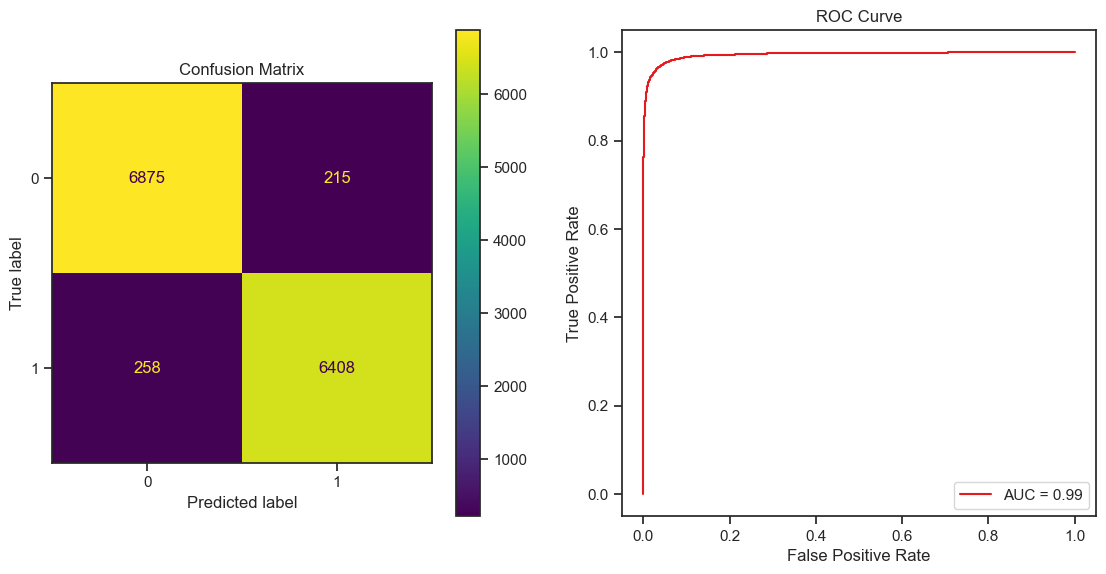

False Positive count: 215
False Negative count: 258
AUC: 0.99


In [27]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc as skl_auc

def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    # Initialize and train the model
    logmodel = LogisticRegression(max_iter=1000)
    start_time = time.time()
    logmodel.fit(X_train, y_train)
    log_train_time = time.time() - start_time

    # Predict and evaluate
    y_pred = logmodel.predict(X_test)
    log_train_score = accuracy_score(y_train, logmodel.predict(X_train))
    log_test_score = accuracy_score(y_test, y_pred)

    # Print performance metrics
    print("Training Time: {:.2f} seconds".format(log_train_time))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Test Score: {:.2f}".format(log_test_score))
    print("Accuracy Train Score: {:.2f}".format(log_train_score))

    return y_pred, logmodel

def plot_performance_metrics(y_test, y_pred, logmodel):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp1 = ConfusionMatrixDisplay(conf_matrix)
    disp1.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    # ROC Curve
    y_score = logmodel.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    log_roc_auc_value = skl_auc(fpr, tpr)

    disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=log_roc_auc_value)
    disp2.plot(ax=ax[1])
    ax[1].set_title('ROC Curve')

    plt.show()

    return conf_matrix, log_roc_auc_value

# Example usage
y_pred, logmodel = train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test)
conf_matrix, log_roc_auc_value = plot_performance_metrics(y_test, y_pred, logmodel)

fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
auc = round(log_roc_auc_value, 2)

print(f"False Positive count: {fp}")
print(f"False Negative count: {fn}")
print(f"AUC: {auc}")
